In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH',
    'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD', 'LRCX', 'LSPD',
    'LULU', 'MA', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NET', 'NVCR',
    'NVDA', 'ODFL', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS',
    'PTON', 'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD',
    'ROKU', 'RVLV', 'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC',
    'TEAM', 'TREX', 'TSCO', 'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR',
    'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'AGI', 'AMEH', 'AMRK', 'APT', 'BTTR', 'BYRN', 'CEF', 'CENN',
    'CGAU', 'CIZN', 'CTGO', 'DTST', 'DYAI', 'EP', 'FCUV', 
    'GCBC', 'GME', 'HMY', 'IDR', 'IEI', 'INTZ', 'KREF',
    'MCVT', 'MICS', 'MIY', 'MNMD', 'MOBQ', 'MTA', 'NAN', 'OMQS',
    'PETV', 'POWW', 'PRPH', 'RVP', 'RVYL', 'SOBR', 'VIRT', 'WAVD',
    'WKHS', 'ZYXI']
BEST_WEIGHTED = [
    'AMRC', 'CF', 'CHEF', 'COOP', 'CSIQ', 'CTSH', 'CVE', 'DQ',
    'ELC', 'ENPH', 'FKWL', 'GGE', 'HBM', 'LFMD', 'NTAP', 'PACB',
    'PAYS', 'RFP']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

81

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-11-12', datetime.date(2022, 11, 12))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  142 of 142 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMRC... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BTTR... BYND... BYRN... CEF... CENN... CF... CGAU... CHEF... CHWY... CIZN... COOP... CRWD... CSIQ... CTGO... CTSH... CVE... DDOG... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EDIT... ELC... ENPH... EP... ETSY... FCUV... FKWL... FLGT... GCBC... GGE... GH... GME... GMED... GOOG... HBM... HMY... IDR... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MA... MCVT... MDB... MELI... MICS... MIY... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NAN... NET... NTAP... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PAYS... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RFP... RGEN... RIVN... RMD... ROKU... RVLV... RVP... RVYL... SBUX... SE... SHOP... SNOW... SOBR

In [5]:
data['Date'].tail()

2514   2022-11-07
2515   2022-11-08
2516   2022-11-09
2517   2022-11-10
2518   2022-11-11
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.996015
2       0.986148
3       0.998406
4       1.004840
5       1.019862
          ...   
2514    1.009614
2515    1.005598
2516    0.979222
2517    1.055434
2518    1.009241
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.003121
2,1.000000
3,1.001053
4,1.020988
5,1.028119
...,...
2514,1.020606
2515,1.023483
2516,0.986743
2517,1.125363


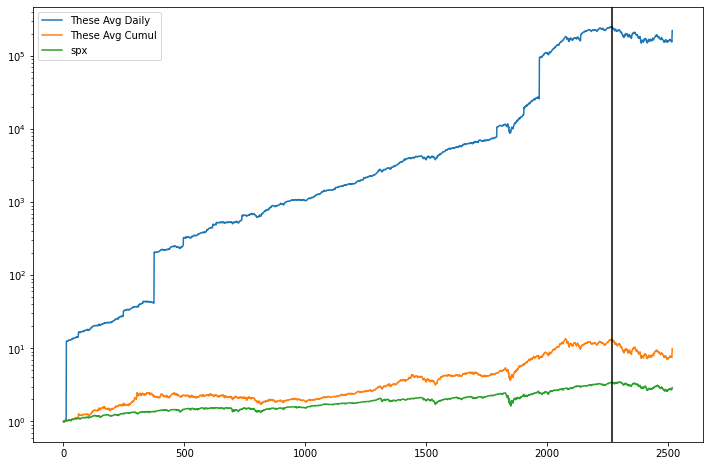

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-11-12,NaN,NaN
1,2012-11-13,1.001938,1.001938
2,2012-11-14,0.987849,0.986175
3,2012-11-15,0.986873,0.982216
4,2012-11-16,0.991548,0.986288


In [10]:
out.tail()

,Date,mine1,mine2
2514,2022-11-07,160633.167637,7.583048
2515,2022-11-08,162098.438116,7.657182
2516,2022-11-09,155694.723265,7.458256
2517,2022-11-10,168956.051642,8.038250
2518,2022-11-11,223361.256052,9.901066


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

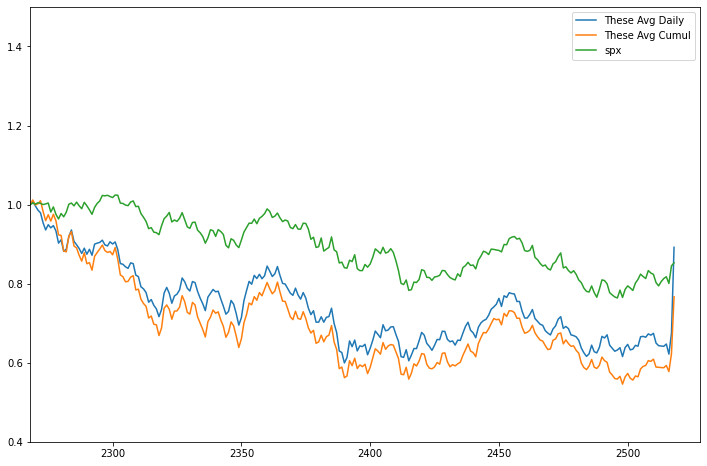

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2459,67.669998,67.669998,69.699997,66.529999,68.250000,4.214643,0.991502,0.966714,0.975000
2460,64.300003,64.300003,66.230003,64.040001,65.849998,4.163560,0.976462,0.950200,0.973105
2461,63.380001,63.380001,64.570000,62.250000,63.090000,4.149148,1.004597,0.985692,0.981182
2462,64.639999,64.639999,67.272003,62.150002,62.639999,4.168833,1.031928,1.019880,0.988324
2463,67.489998,67.489998,68.000000,65.040001,67.820000,4.211979,0.995134,1.044090,1.049196


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2459,67.669998,67.669998,69.699997,66.529999
2460,64.300003,64.300003,66.230003,64.040001
2461,63.380001,63.380001,64.570000,62.250000
2462,64.639999,64.639999,67.272003,62.150002
2463,67.489998,67.489998,68.000000,65.040001


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2459,67.669998,67.669998,69.699997,66.529999,66.230003,64.040001,0.978720,0.946357
2460,64.300003,64.300003,66.230003,64.040001,64.570000,62.250000,1.004199,0.968118
2461,63.380001,63.380001,64.570000,62.250000,67.272003,62.150002,1.061407,0.980593
2462,64.639999,64.639999,67.272003,62.150002,68.000000,65.040001,1.051980,1.006188
2463,67.489998,67.489998,68.000000,65.040001,68.550003,62.919998,1.015706,0.932286


0.05    0.972145
Name: HighMult, dtype: float64


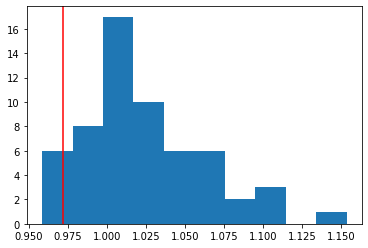

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0303847137104316


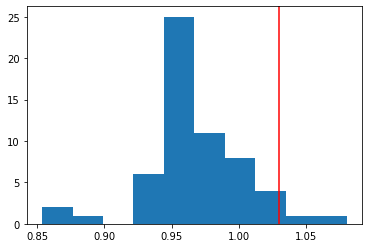

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0303847137104316, 0.9721450402691196)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0128013800734783, 0.9845593740180999)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2459,67.669998,67.669998,69.699997,66.529999,66.230003,64.040001,0.978720,0.946357,0
2460,64.300003,64.300003,66.230003,64.040001,64.570000,62.250000,1.004199,0.968118,0
2461,63.380001,63.380001,64.570000,62.250000,67.272003,62.150002,1.061407,0.980593,0
2462,64.639999,64.639999,67.272003,62.150002,68.000000,65.040001,1.051980,1.006188,0
2463,67.489998,67.489998,68.000000,65.040001,68.550003,62.919998,1.015706,0.932286,1


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(0.9966762850546553,
 0.9622553849877885,
 1.0313767509443872,
 0.9769909875861004)

In [27]:
get_hilo_mults(aapl)

(1.0058353862739453,
 0.9839317075022501,
 1.0126398877331897,
 0.9905263145163717)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.005835,0.983932,1.012640,0.990526
1,ABMD,1.002647,0.996050,1.006033,0.992283
2,ABNB,1.007399,0.988240,1.021330,0.987179
3,ACN,1.002040,0.990314,1.009050,0.991742
4,ADBE,1.010887,0.986331,1.009762,0.981831


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,149.699997,AAPL
ABMD,373.98999,ABMD
ABNB,109.57,ABNB
ACN,290.089996,ACN
ADBE,341.149994,ADBE
...,...,...
ZM,88.32,ZM
ZYXI,13.0,ZYXI
^GSPC,3992.929932,^GSPC
^IXIC,11323.331055,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.005835,0.983932,1.012640,0.990526,149.699997
1,ABMD,1.002647,0.996050,1.006033,0.992283,373.98999
2,ABNB,1.007399,0.988240,1.021330,0.987179,109.57
3,ACN,1.002040,0.990314,1.009050,0.991742,290.089996
4,ADBE,1.010887,0.986331,1.009762,0.981831,341.149994


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv